# <center> Creating the Steel Alphabet Dataset </center>

## Processing Steps

### Load the Dataset

In [1]:
from datasets import load_dataset

iam_data = load_dataset("gagan3012/IAM")["train"]
iam_data

Dataset({
    features: ['image', 'label', 'text'],
    num_rows: 11344
})

#


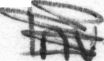

In [17]:
from PIL import Image

idx = 1901
english_text = iam_data[idx]["text"]
english_image = iam_data[idx]["image"].convert("RGB")
print(english_text)
display(english_image)

### Translate and Render

In [18]:
from translate import english_to_steel_phonetics

steel_text = english_to_steel_phonetics(english_text)
print(steel_text)

#


In [19]:
from PIL import ImageFont
from render_text import text_to_image

fontsize = 50
font = ImageFont.truetype("AlloyofLaw/AlloyofLaw.ttf", size=fontsize)
# font = ImageFont.truetype("AlloyofLaw.ttf", size=fontsize)
steel_image = text_to_image(steel_text, font=font)
display(steel_image)

<PIL.Image.Image image mode=RGB size=0x0>

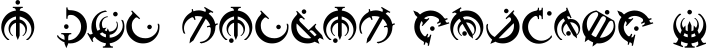

In [ ]:
from PIL import ImageFont
from render_text import text_to_image

fontsize = 50
# font = ImageFont.truetype("Noto_Sans_Deseret/NotoSansDeseret-Regular.ttf", size=fontsize)
font = ImageFont.truetype("AlloyofLaw/AlloyofLaw.ttf", size=fontsize)
steel_image = text_to_image("I can render symbols", font=font)
display(steel_image)

### Image Preprocessing Examples

In [7]:
from transformers import TrOCRProcessor
import torchshow

processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-printed")
processor.current_processor

ViTImageProcessor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 384,
    "width": 384
  }
}

torch.Size([1, 3, 384, 384])


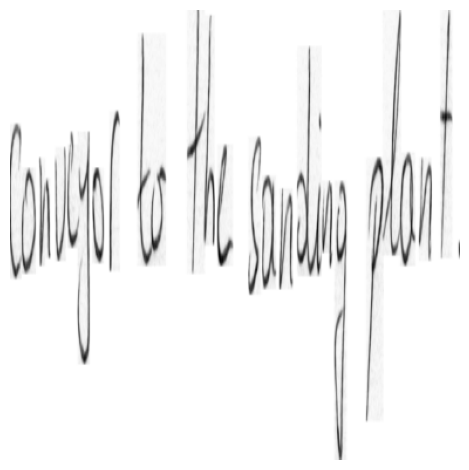

In [8]:
# English example
english_pixel_values = processor(english_image, return_tensors="pt").pixel_values
print(english_pixel_values.shape)
torchshow.show(english_pixel_values)

torch.Size([1, 3, 384, 384])


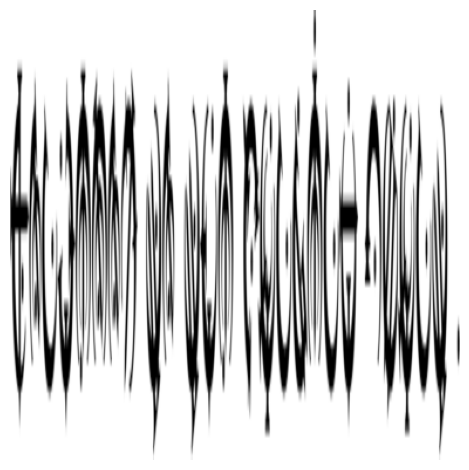

In [9]:
# Deseret example
steel_pixel_values = processor(steel_image, return_tensors="pt").pixel_values
print(steel_pixel_values.shape)
torchshow.show(steel_pixel_values)

### Datum Final Example

conveyor to the sanding plant .


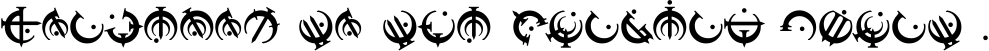

In [10]:
print(english_text)
display(steel_image)

## Apply the Steel Alphabet to the Dataset

In [11]:
from translate import english_to_steel_phonetics

def translate_steel(batch):
    steel_texts = [english_to_steel_phonetics(text) for text in batch["text"]]
    return {"english": batch["text"], "steel": steel_texts}

iam_translated = iam_data.map(translate_steel, batched=True, batch_size=100, remove_columns=["text"])

Map:   0%|          | 0/11344 [00:00<?, ? examples/s]

In [13]:
def apply_text_rendering(batch):
    fontsize = 50
    font = ImageFont.truetype("AlloyofLaw/AlloyofLaw.ttf", size=fontsize)
    images = [text_to_image(text, font=font) for text in batch["steel"]]
    return {"image": images}

iam_steel = iam_translated.map(apply_text_rendering, batched=True, batch_size=1)

Map:   0%|          | 0/11344 [00:00<?, ? examples/s]

SystemError: tile cannot extend outside image

In [ ]:
index = 2093
print(iam_steel[index]["english"])
print(iam_steel[index]["steel"])
display(iam_steel[index]["image"])

In [ ]:
iam_deseret.push_to_hub("cayjobla/iam-steel")